      X:
0
5
10
15
20
25
30
35
40
45
50
55
         Y:
9.90132706175565
10.224460606089593
10.126324116818417
10.1443774339522
10.202282882103546
10.386405807133107
10.390153515011235
10.724328999948948
10.71829599067137
11.185792208230339
11.208455868463734
11.347532800913095


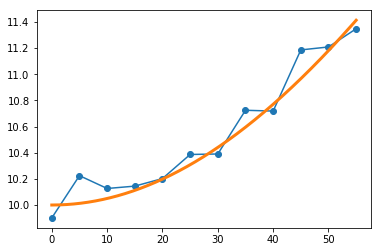

In [2]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from scipy.optimize import root
import sympy

mu,sigma=0,0.1
n=12
u=0.1
y=10
h=5
Y=[0.]*n
X=[0.]*n
t_=np.linspace(0,55,1000)
trueY=[0.]*1000

def trY(u,t,y):
    return sqrt((u*t)**2+y**2)

W=np.random.normal(mu,sigma,n)
if (abs(mu-np.mean(W))<0.01):
        print("true")
print("      X:")    
for k in range(0,n):
    X[k]=h*k
    print X[k]
print("         Y:")
for k in range(0,n):
    Y[k]=trY(u,X[k],y)+W[k]
    print Y[k]

for i in range(0,1000):
    trueY[i]=trY(u,t_[i],y)
    
    
fig=plt.figure()
plt.plot(X,Y,marker='o')
plt.plot(t_,trueY,linewidth=3)


In [48]:
def estY3(th,t):
    return th[0]+th[1]*t+th[2]*t*t/2
def D(t):
    x = complex(*t)
    2.9970029970030232e-8*x**4 - 6.5934065934066539e-6*x**3 + 0.00044555444555444961*x**2 - 0.0075824175824176439*x + 0.054670329670329955
    
H3=np.array([[0.,0.,0.],
  [0.,0.,0.],
  [0.,0.,0.],
  [0.,0.,0.],
  [0.,0.,0.],
  [0.,0.,0.],
  [0.,0.,0.],
  [0.,0.,0.],
  [0.,0.,0.],
  [0.,0.,0.],
  [0.,0.,0.],
  [0.,0.,0.]])
I=np.eye(n)
disigma=sigma**2
theta3=[0.]*3

for i in range(0,n):
    H3[i][0]=1
    H3[i][1]=h*i
    H3[i][2]=(h*i)**2
print H3

H3_=H3.transpose()
print H3_
A=H3_.dot(H3)
A=np.linalg.inv(A)
A=A.dot(H3_)
theta3=A.dot(Y)
print("theta: %.20f" % theta3[0])
print( "\t%.20f" % theta3[1])
print( "\t%.20f" % theta3[2])


[[1.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 5.000e+00 2.500e+01]
 [1.000e+00 1.000e+01 1.000e+02]
 [1.000e+00 1.500e+01 2.250e+02]
 [1.000e+00 2.000e+01 4.000e+02]
 [1.000e+00 2.500e+01 6.250e+02]
 [1.000e+00 3.000e+01 9.000e+02]
 [1.000e+00 3.500e+01 1.225e+03]
 [1.000e+00 4.000e+01 1.600e+03]
 [1.000e+00 4.500e+01 2.025e+03]
 [1.000e+00 5.000e+01 2.500e+03]
 [1.000e+00 5.500e+01 3.025e+03]]
[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
  1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [0.000e+00 5.000e+00 1.000e+01 1.500e+01 2.000e+01 2.500e+01 3.000e+01
  3.500e+01 4.000e+01 4.500e+01 5.000e+01 5.500e+01]
 [0.000e+00 2.500e+01 1.000e+02 2.250e+02 4.000e+02 6.250e+02 9.000e+02
  1.225e+03 1.600e+03 2.025e+03 2.500e+03 3.025e+03]]
theta: 10.01231168112166969308
	0.00522070911541333560
	0.00037068483079404383


[[ 5.46703297e-01 -3.79120879e-02  5.49450549e-04]
 [-3.79120879e-02  3.90609391e-03 -6.59340659e-05]
 [ 5.49450549e-04 -6.59340659e-05  1.19880120e-06]]
0.38557722366681496


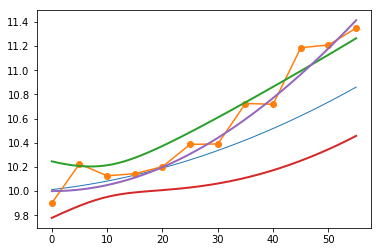

In [66]:
H3def=np.linalg.inv(H3_.dot(H3))
print H3def


sigI=np.eye(12)
for i in range(0,n):
    sigI[i][i]=I[i][i]*disigma
#print sigI

DestYlast3withoutlast_=H3.dot(H3def)
DestYlast3withoutlast=[['']*3]*12
for i in range(n):
    DestYlast3withoutlast[i][0]=str(DestYlast3withoutlast_[i][0])
    DestYlast3withoutlast[i][1]=str(DestYlast3withoutlast_[i][1])
    DestYlast3withoutlast[i][2]=str(DestYlast3withoutlast_[i][2])
#print DestYlast3withoutlast
    
DestYlast3=['']*n
for i in range(0,n):
    DestYlast3[i]=DestYlast3withoutlast[i][0]+DestYlast3withoutlast[i][1]+'*t'+'+'+DestYlast3withoutlast[i][2]+'*t*t/2'   
#print DestYlast3




DestYfirst2=['']*3
for i in range(0,3):
    DestYfirst2[i]=str(H3def[i][0])+str(H3def[i][1])+'*t+'+str(H3def[i][2])+'*t*t/2'
    #print DestYfirst2[i]

DestYfirst3=['']*n
for i in range(0,n):
    DestYfirst3[i]='('+DestYfirst2[0]+'+('+DestYfirst2[1]+')*'+str(H3_[1][i])+'+('+DestYfirst2[2]+')*'+str(H3_[2][i])+')'
    #print DestYfirst3[i]

DestYfirst4=['']*n
for i in range(0,n):
    DestYfirst4[i]='('+DestYfirst3[i]+')*'+str(sigma)
    #print DestYfirst4[i]

DestY=''
for i in range(12):
    DestY+=DestYfirst4[i]+'*'+DestYfirst3[i]+'+'
DestY='((0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*0.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*0.0))*0.1*(0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*0.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*0.0)+((0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*5.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*25.0))*0.1*(0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*5.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*25.0)+((0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*10.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*100.0))*0.1*(0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*10.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*100.0)+((0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*15.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*225.0))*0.1*(0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*15.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*225.0)+((0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*20.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*400.0))*0.1*(0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*20.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*400.0)+((0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*25.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*625.0))*0.1*(0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*25.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*625.0)+((0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*30.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*900.0))*0.1*(0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*30.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*900.0)+((0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*35.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*1225.0))*0.1*(0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*35.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*1225.0)+((0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*40.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*1600.0))*0.1*(0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*40.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*1600.0)+((0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*45.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*2025.0))*0.1*(0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*45.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*2025.0)+((0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*50.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*2500.0))*0.1*(0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*50.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*2500.0)+((0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*55.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*3025.0))*0.1*(0.5467032967032981-0.03791208791208806*t+0.0005494505494505518*t*t/2+(-0.03791208791208807+0.0039060939060939237*t-6.593406593406623e-05*t*t/2)*55.0+(0.0005494505494505522-6.593406593406624e-05*t+1.198801198801204e-06*t*t/2)*3025.0)'
DestYY=sympy.simplify(DestY)
#print DestYY




Q=np.quantile(np.random.normal(0,1),0.950)
print Q

DoverGran1=str(theta3[0])+'+'+str(theta3[1])+'*t'+'+'+str(theta3[2])+'*t*t/2''+'+'sqrt('+str(DestYY)+')'
DoverGran2=str(theta3[0])+'+'+str(theta3[1])+'*t'+'+'+str(theta3[2])+'*t*t/2''-'+'sqrt('+str(DestYY)+')'
#print DoverGran1
#print DoverGran2

DG1=[0.]*1000
DG2=[0.]*1000
DesY=[0.]*1000
for i in range(0,1000):
    DG1[i]=10.01231168112167+0.005220709115413336*t_[i]+0.00037068483079404383*t_[i]*t_[i]/2+sqrt(2.9970029970030232e-8*t_[i]**4 - 6.5934065934066539e-6*t_[i]**3 + 0.00044555444555444961*t_[i]**2 - 0.0075824175824176439*t_[i] + 0.054670329670329955)
   
    DG2[i]=10.01231168112167+0.005220709115413336*t_[i]+0.00037068483079404383*t_[i]*t_[i]/2-sqrt(2.9970029970030232e-8*t_[i]**4 - 6.5934065934066539e-6*t_[i]**3 + 0.00044555444555444961*t_[i]**2 - 0.0075824175824176439*t_[i] + 0.054670329670329955)
    DesY[i]=  2.9970029970030232e-8*t_[i]**4 - 6.5934065934066539e-6*t_[i]**3 + 0.00044555444555444961*t_[i]**2 - 0.0075824175824176439*t_[i] + 0.054670329670329955
    estY_=[0.]*1000
for i in range(0,1000):
    estY_[i]=estY(theta3,t_[i])
fig=plt.figure()
plt.plot(t_,estY_,linewidth=1)
plt.plot(X,Y,marker='o')
plt.plot(t_,DG1,linewidth=2)
plt.plot(t_,DG2,linewidth=2)
plt.plot(t_,trueY,linewidth=2)


3.3855655734380763


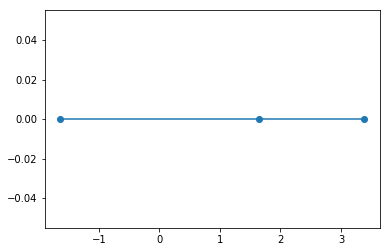

In [79]:
Ktheta=[[0.]*3]*3
Ktheta=disigma*H3def
#for i in range(0,3):
    #print Ktheta[i][0],Ktheta[i][1],Ktheta[i][2]
    
DispersionTheta=Ktheta[2][2]
#Theta_=np.random.normal(theta3[2],DispersionTheta)

ddelta1=-1.64485
ddelta2=1.64485
T_=theta3[2]/sqrt(DispersionTheta)
print T_
A=[ddelta1,ddelta2,T_]
B=[0,0,0]
#fig=plt.figure()
plt.plot(A,B,marker='o')


(61)
[10.01231168 10.04768235 10.10158726 10.1740264  10.2649998  10.37450743
 10.5025493  10.64912542 10.81423578 10.99788037 11.20005921 11.4207723 ]

(62)
[-0.60898576  1.01554227 -0.33342293 -0.44774526  0.71518812 -0.87602182
 -0.1261967  -1.0280162  -0.49365311 -0.89719684 -0.79006693  0.49032354]

(63)
9.934820590399768
9.936820390439758
9.942817392957211
9.952804419494322
9.96676955358733
9.984696211520658
10.006563240011106
10.032345039491238
10.0620117113375
10.095529227104198
10.132859617585337
10.173961179335931

(64)
-0.0774910907219013
-0.1108619570288294
-0.15876986239799606
-0.22122198528720638
-0.29823024216022453
-0.38981121673262287
-0.49598606228760467
-0.6167803783926011
-0.7522240636711732
-0.9023511465690106
-1.0671995962921095
-1.2468111162854552

(65)


(array([1., 1., 1., 0., 1., 1., 1., 1., 2., 3.]),
 array([-1.24681112, -1.12987911, -1.01294711, -0.89601511, -0.77908311,
        -0.6621511 , -0.5452191 , -0.4282871 , -0.3113551 , -0.19442309,
        -0.07749109]),
 <a list of 10 Patch objects>)

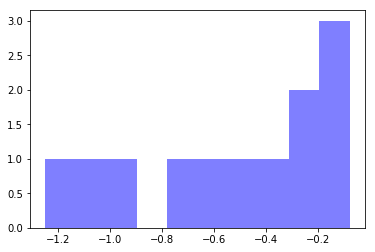

In [85]:
print("")    
print("(61)")
Ost=H3.dot(theta3)
print Ost
    
print("")    
print("(62)")
Ost2=[0.]*12
l=2
Weird3Y=[0.]*12
W1=np.random.normal(0,1,n)
print W1
    
print("")    
print("(63)")
for i in range(0,n):
    Weird3Y[i]=trY(u,l*i,y)+W[k]
    print Weird3Y[i]
    
print("")    
print("(64)")
for i in range(0,12):
    Ost2[i]=Weird3Y[i]-Ost[i]
    print Ost2[i]
    
print("")    
print("(65)")
fig=plt.figure()
plt.hist(Ost2,facecolor='blue',alpha=0.5)